In [3]:
import  numpy as np
import numpy.linalg as la
from scipy.sparse import random
import scipy.sparse as sparse

In [4]:
def jacobi(A,x,b,max_iter = 100,epsilon = 10e-4):
    print(A.shape)
    D = np.diag(np.diag(A))
    norm_b = la.norm(b)
    print(D.shape)
    D_inv = la.inv(D)
    r_vector = []
    for i in range(max_iter):
        x = x + (1/100) * D_inv @ (b - A @ x)
        # verify
        r = la.norm(A @ x - b)
        r_vector.append(r)
        if r / norm_b < epsilon:
            break
    return x,r_vector

In [5]:
def Gauss_Seidal(A,x,b,max_iter = 100,epsilon = 10e-4):
    # todo: understand it better :(
    M = np.tril(A) # represent L + D
    norm_b = la.norm(b)
    M_inv = la.inv(M)
    r_vector = []
    for i in range(max_iter):
        x = x + M_inv @ (b - A @ x)
        # verify
        r = la.norm(A @ x - b)
        r_vector.append(r)
        if r / norm_b < epsilon:
            break
    return x,r_vector


In [6]:
def SD(A,x,b,max_iter = 100,epsilon = 10e-4):
    norm_b = la.norm(b)
    r_vector = []
    for i in range(max_iter):
        rk = b - A @ x
        alpha = (rk @ rk) / (rk @ (A@rk))
        x = x + alpha * rk
        r = la.norm(A @ x - b)
        r_vector.append(r)
        if r / norm_b < epsilon:
            break
    return x,r_vector

In [7]:
def CG(A,x,b,max_iter = 100,epsilon = 10e-4):
    norm_b = la.norm(b)
    r = b - A @ x
    p = r
    alpha = 0
    r_vector = []
    for i in range(max_iter):
        rk = b - A @ x
        alpha = (rk @ rk) / (rk @ (A@rk))
        x = x + alpha * p
        r_prev = r
        r = b - A @ x
        r_norm = la.norm(r)
        r_vector.append(r_norm)
        if r_norm / norm_b < epsilon:
            break
        beta =   np.inner(r,r) / np.inner(r_prev,r_prev)
        p = r + beta * p

    return x,r_vector

In [8]:
def CG2(A,x,b,max_iter = 100,epsilon = 10e-4):
    norm_b = la.norm(b)
    rk = b - A @ x
    p = np.array(rk)
    alpha = 0
    r_vector = []
    for i in range(max_iter):
        r_prev = np.array(rk)
        alpha = (rk @ rk) / (rk @ (A@rk))
        x = x + alpha * p
        rk = b - A @ x
        r_norm = la.norm(rk)
        r_vector.append(r_norm)
        if r_norm / norm_b < epsilon:
            break
        beta = np.inner(rk,rk) / np.inner(r_prev,r_prev)
        p = rk + beta * p

    return x,r_vector

In [9]:
n = 256
A = random(n, n, 5 / n, dtype=float)
v = np.random.rand(n)
v = sparse.spdiags(v, 0, v.shape[0], v.shape[0], 'csr')
A = A.transpose() * v * A + 0.1*sparse.eye(n)
b = np.random.rand(n)
x_start = np.zeros(n)
A = np.array(A.toarray())
print(f'type {type(A)}')
print(A.shape)
print()

x_jacobi,r_jacobi = jacobi(A,x_start,b)
x_gs, r_gs = Gauss_Seidal(A,x_start,b)
x_sd, r_sd = SD(A,x_start,b)
x_cg, r_cg = CG2(A,x_start,b)
x_GMRES1, r_GMRES1 = GMRES1(A,x_start,b)
import matplotlib.pyplot as plt
plt.semilogy(r_jacobi)
plt.title("Jacobi method")
plt.show()
plt.semilogy(r_gs)
plt.title("Gauss-Seidel method")
plt.show()
plt.semilogy(r_sd)
plt.title("Steepest Descent method")
plt.show()
plt.semilogy(r_cg)
plt.title("Conjugate Gradient method")
plt.show()
plt.semilogy(r_GMRES1)
plt.title("GMRES method")
plt.show()



type <class 'numpy.ndarray'>
(256, 256)

(256, 256)
(256, 256)


NameError: name 'GMRES1' is not defined

In [10]:
def GMRES1(A,x,b,max_iter = 50,epsilon = 10e-10):
    norm_b = la.norm(b)
    alpha = 0
    r_vector = []
    for i in range(max_iter):
        rk = b - A @ x
        alpha = ((rk.transpose()@A) @ rk) / ((rk.transpose() @ A.transpose()) @ (A@rk))
        x = x + alpha * rk
        r = la.norm(A @ x - b)
        r_vector.append(r)
        if r / norm_b < epsilon:
            break
    return x,r_vector

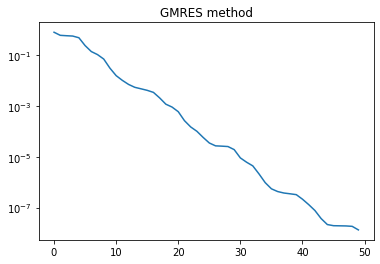

In [11]:
A = np.array([[5,4,4,-1,0], [3,12,4,-5,-5], [-4,2,6,0,3], [4,5,-7,10,2], [1,2,5,3,10]])
b = np.array([1,1,1,1,1])
x_start = np.array([0,0,0,0,0])


x_GMRES1, r_GMRES1 = GMRES1(A,x_start,b)
import matplotlib.pyplot as plt
plt.semilogy(r_GMRES1)
plt.title("GMRES method")
plt.show()




In [44]:
def GMRES2(A,x,b,max_iter = 50,epsilon = 10e-10):
    norm_b = la.norm(b)
    r_vector = []
    Rk = np.zeros((2, len(x)))
    RkT = Rk.transpose()
    for i in range(max_iter):
        Rk[1] = Rk[0]
        Rk[0] = b - A @ x
        print(Rk @ A.transpose() @ A @ Rk.transpose())
        alpha = (Rk[0] @ A @ Rk.transpose()) * la.inv(Rk @ A.transpose() @ A @ Rk.transpose())
        # print(alpha)
        x = x + alpha @ Rk
        # print(x)
        r_norm = la.norm(A @ x - b)
        r_vector.append(r_norm)
        if r_norm / norm_b < epsilon:
            break
    return x,r_vector

In [45]:
A = np.array([[5,4,4,-1,0], [3,12,4,-5,-5], [-4,2,6,0,3], [4,5,-7,10,2], [1,2,5,3,10]])
b = np.array([1,1,1,1,1])
x_start = np.array([0,0,0,0,0])


x_GMRES2, r_GMRES2 = GMRES2(A,x_start,b)
import matplotlib.pyplot as plt
plt.semilogy(r_GMRES1)
plt.title("GMRES 2 method")
plt.show()

[[911.   0.]
 [  0.   0.]]


LinAlgError: Singular matrix

In [14]:
    Rk = np.zeros((2, 10))


In [15]:
Rk

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])